### Análisis Exploratorio estadístico

En la consola:

pip install panda

pip install matplotlib

pip install wordcloud

pip install numpy

pip install openpyxl

##### Importamos las librerías y el archivo excel

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

datos = pd.read_excel('session1-pizza.xlsx', decimal=",")

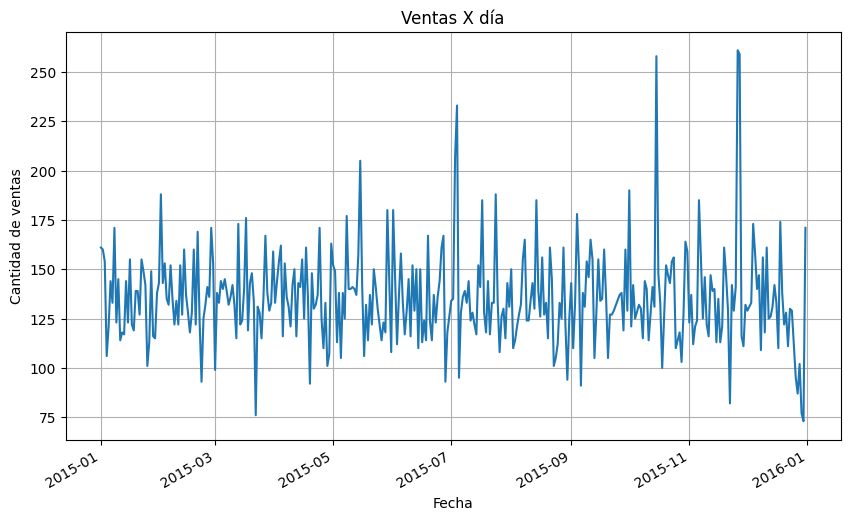

In [9]:
datos['order_date'] = pd.to_datetime(datos['order_date'], format='%d/%m/%Y')

ventas_diarias = datos.groupby(datos['order_date']).size()
ventas_diarias.index = pd.to_datetime(ventas_diarias.index)

plt.figure(figsize=(10, 6))
ventas_diarias.plot()
plt.title('Ventas X día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ventas')
plt.grid(True)
plt.show()

Ventas por trimestre:
 order_date
2015-03-31    12234
2015-06-30    12331
2015-09-30    12214
2015-12-31    11841
Freq: Q-DEC, dtype: int64
Mejores semanas en venta:
 order_date
2015-11-29    1159
2015-07-05    1048
2015-05-17    1027
2015-04-05    1001
2015-12-06     996
dtype: int64
Peores semanas en venta:
 order_date
2016-01-03    423
2015-01-04    581
2015-09-27    658
2015-12-27    680
2015-10-11    775
dtype: int64


<Figure size 1400x800 with 0 Axes>

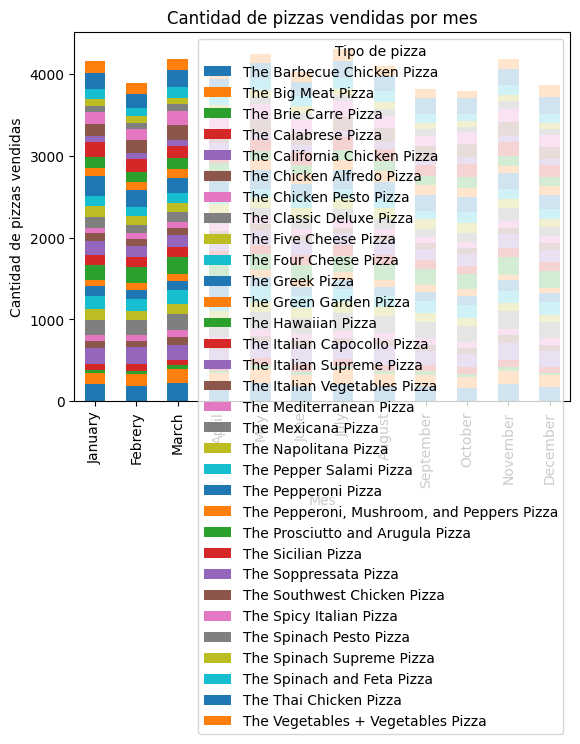

In [12]:
trimestres_ventas = ventas_diarias.resample('Q').sum()
print("Ventas por trimestre:\n", trimestres_ventas)

semanas_ventas = ventas_diarias.resample('W').sum()
mejores_semanas = semanas_ventas.sort_values(ascending=False).head(5)
peores_semanas = semanas_ventas.sort_values(ascending=True).head(5)
print("Mejores semanas en venta:\n", mejores_semanas)
print("Peores semanas en venta:\n", peores_semanas)

datos['order_month'] = datos['order_date'].dt.month
pizza_por_mes = datos.groupby(['order_month', 'pizza_name']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
pizza_por_mes.plot(kind='bar', stacked=True)
plt.title('Cantidad de pizzas vendidas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pizzas vendidas')
plt.xticks(np.arange(12), ['January', 'Febrery', 'March', 'April', 'May', 
                           'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend(title='Tipo de pizza')
plt.show()

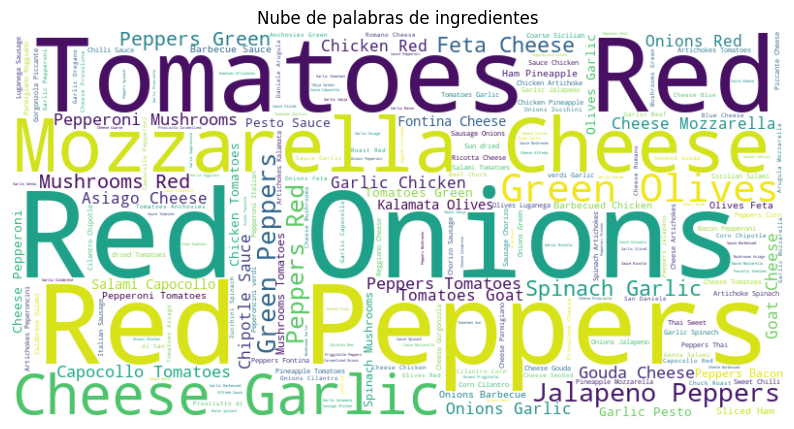

In [13]:
datos['pizza_ingredients'] = datos['pizza_ingredients'].astype(str)
ingredientes = ' '.join(datos['pizza_ingredients'])
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(ingredientes)

plt.figure(figsize=(10, 6))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de ingredientes')
plt.show()